In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

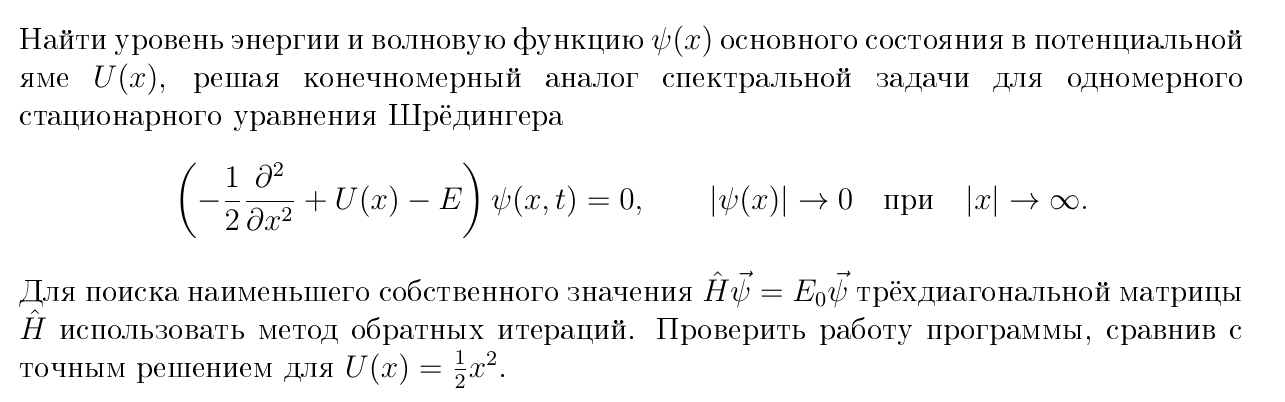

In [2]:
Image('task 11.png')

Method: p21

$$
{\large-\frac{1}{2}\psi''+\frac{1}{2}x^2\psi-E\psi=0\ \Rightarrow\ } oscillator
$$

Analytic solution:

$$
{\large E_n=\hbar\omega(n+\frac{1}{2})} \\
{\large \psi_n(x)=\frac{1}{\sqrt{2^nn!}} \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} \exp\left(\frac{-m\omega x^2}{2\hbar}\right) H_n\left(\sqrt{\frac{m\omega}{\hbar}} x\right)}
$$

$$
\large \hbar=m=\omega=1\ \Rightarrow\ E_0=\frac{1}{2};\ \psi_0(x)=\left(\frac{1}{\pi}\right)^{\frac{1}{4}} \exp\left(-\frac{x^2}{2}\right)
$$

Numerically:

$$
\large
\psi'' \approx \frac{\psi_{i-1}-2\psi_i+\psi_{i+1}}{h^2}
$$

Substituting into the equation:

$$
{\large -\frac{1}{2h^2}\psi_{i-1}+(\frac{1}{h^2}+U_i)\psi_i-\frac{1}{2h^2}\psi_{i+1}=E}
$$

Let:

$$
\large \alpha_i = U_i + \frac{1}{h^2} \\ \Rightarrow \psi_{i-1}+\alpha_i\psi_i+\psi_{i+1}=E\psi_i
$$

So, we have system of equations:


$$
\large\left (\begin{matrix}
 \alpha_0 & 1 & 0 & 0 & \dots & 0 & 0 & 0 \\
 -\frac{1}{2h^2} & \alpha_1 & -\frac{1}{2h^2} & 0 & \dots & 0 & 0 & 0 \\
 0 & -\frac{1}{2h^2} & \alpha_2 & -\frac{1}{2h^2} & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & -\frac{1}{2h^2} & \alpha_{n-1} & -\frac{1}{2h^2} \\
 0 & 0 & 0 & 0 & \dots & 0 & -\frac{1}{2h^2} & \alpha_n
\end{matrix}\right ) * \left(\begin{matrix} \psi_0 \\ \psi_1 \\ \psi_2 \\ \vdots \\ \psi_{n-1} \\ \psi_n \end{matrix}\right)
=
\left(\begin{matrix}
\psi_1 \\
\psi_2 \\
\psi_3 \\
\vdots \\
\psi_{n-1}\\
\psi_n
\end{matrix}\right)
= H\overline{\psi}
$$

$$
{\large H\psi^{[1]} = \sum_i c_i \lambda_i \psi_i^{[0]} \to_{iter\to\inf}H\psi=\lambda_{max}\psi}
$$

But we need $\lambda_{min}$. So:

$$
{\large \widetilde{\lambda}_{max} = \frac{1}{\lambda_{min}}\ for\ \widetilde{H}=H^{-1}}
$$

$$
{\large H\cdot\ |\  H^{-1}\psi^{[0]}=\widetilde{\lambda}_{max}\psi^{[1]}} \\
{\large H\cdot(\widetilde{\lambda}_{max}\psi^{[1]})=\psi^{[1]}}
$$

So, we need to do k iterations like:

$$
{\large H\cdot\psi^{[i]}=\psi^{[i-1]}}
$$

Here $\psi^{[i]}$ is not normed and contains $\widetilde{\lambda}_{max}$.
But $\psi^{[i-1]}$ have to be normed.

$$
{\large e = \lambda_{min} = \left( \frac{\psi_1^{[k-1]}}{\psi_1^{[k]}} + \frac{\psi_2^{[k-1]}}{\psi_2^{[k]}} + \dots + \frac{\psi_n^{[k-1]}}{\psi_n^{[k]}} \right)}
$$

In [3]:
L = 10  #  Lets think that |psi(+-L)| = 0
E0 = 0.4

N = 2000    # Number of steps along x
M = 20      # Number of iterations
h = 2 * L / N

r = 1 / h**2

In [4]:
U = lambda x: pow(x, 2)/2
solution = lambda x: pow(np.pi, -1 / 4) * np.exp(- pow(x, 2) / 2)

In [5]:
x = np.linspace(-L, L, N + 1) # x values
u = U(x)                      # u values

In [6]:
def TridiagonalMatrix(e):
    a = [0] + [-r/2 for _ in range(N-1)] + [0]
    b = [u[i] + r for i in range(N + 1)]
    # B = [u + r]
    c = [0] + [-r/2 for _ in range(N-1)] + [0]
    d = e

    for i in range(1, N + 1):
        xi = a[i] / b[i - 1]
        b[i] -= xi * c[i - 1]
        d[i] -= xi * d[i - 1]
    y = np.zeros(N + 1)
    y[-1] = d[-1] / b[-1]
    for i in range(N - 1, -1, -1):
        y[i] = (d[i] - c[i] * y[i + 1]) / b[i]
    return y

In [7]:
def mod(x):
    return np.sqrt(np.sum(pow(x, 2)))

In [8]:
e0 = abs(x)
e0 /= mod(e0)

In [9]:
def eigen_sol(start):
    # Do M iterations for H*Psi^[n+1]=Psi^[n]
    # Returns E0, err=abs(E0^[M]-E0^[M-1]), Psi0
    E = start
    Psi = E0
    prev_Psi = Psi
    for i in range(M):
        E = TridiagonalMatrix(E)
        n = mod(E)
        prev_Psi = Psi
        Psi = 1 / n
        E /= n
    return Psi, abs(Psi - prev_Psi), E


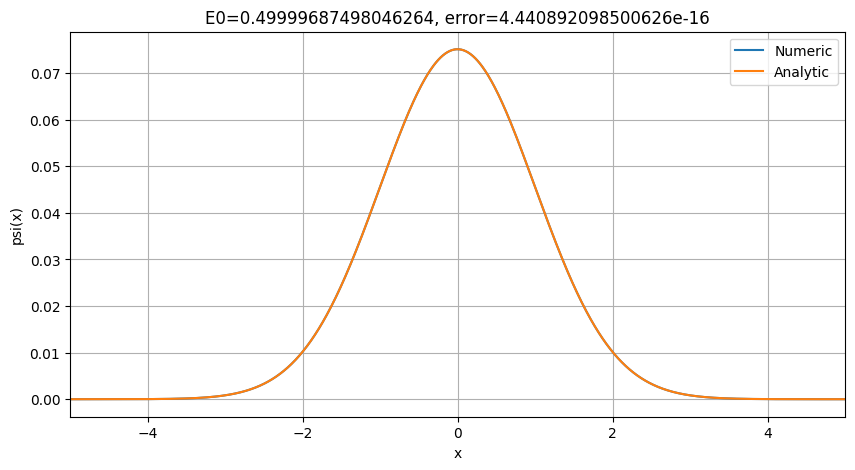

In [10]:
E, delta, psi = eigen_sol(e0)

n = mod(np.exp(-x**2 / 2))
exact = np.exp(-x**2 / 2) / n  # Analytic

plt.figure(figsize=(10,5))
plt.plot(x, psi, label='Numeric')
plt.plot(x, exact, label='Analytic')
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.grid()
plt.xlim([-5,5])
plt.legend()
plt.title('E0='+str(E)+', error='+str(delta))
plt.show()